In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import pylab 
import scipy.stats as stats

In [25]:
df = pd.read_excel("data.xlsx")
df.columns = df.columns.str.strip()
df

,JISDOR,JCI,ID Inflation Rate,BI Rate,ID International Reserves,USA Interest Rate
0,14236.81,5612.4,1.59,3.75,133.556,0.25
1,14165.68,5862.4,1.68,3.75,135.897,0.25
2,14061.90,5979.1,1.55,3.75,138.005,0.25
3,14043.74,5979.1,1.38,3.50,138.787,0.25
4,14417.23,5985.5,1.37,3.50,137.095,0.25
5,14551.05,5995.6,1.42,3.50,138.799,0.25
6,14333.53,5947.5,1.68,3.50,136.398,0.25
7,14351.48,5985.5,1.33,3.50,137.093,0.25
8,14507.38,6070.0,1.52,3.50,137.343,0.25
9,14389.90,6286.9,1.59,3.50,144.784,0.25


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   JISDOR                     50 non-null     float64
 1   JCI                        50 non-null     float64
 2   ID Inflation Rate          50 non-null     float64
 3   BI Rate                    50 non-null     float64
 4   ID International Reserves  50 non-null     float64
 5   USA Interest Rate          50 non-null     float64
dtypes: float64(6)
memory usage: 2.5 KB


In [14]:
df.describe()

,JISDOR,JCI,ID Inflation Rate,BI Rate,ID International Reserves,USA Interest Rate
count,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000
mean,15030.046200,6776.55200,2.886600,4.815000,140.153880,3.071400
std,665.368288,506.79233,1.396156,1.185381,5.738943,2.331396
min,14043.740000,5612.40000,1.330000,3.500000,130.197000,0.250000
25%,14357.412500,6545.72500,1.680000,3.500000,136.383750,0.250000
50%,14986.165000,6923.55000,2.565000,5.375000,138.886000,4.250000
75%,15605.795000,7112.80000,3.542500,6.000000,144.874750,5.500000
max,16337.330000,7670.70000,5.950000,6.250000,155.719000,5.500000


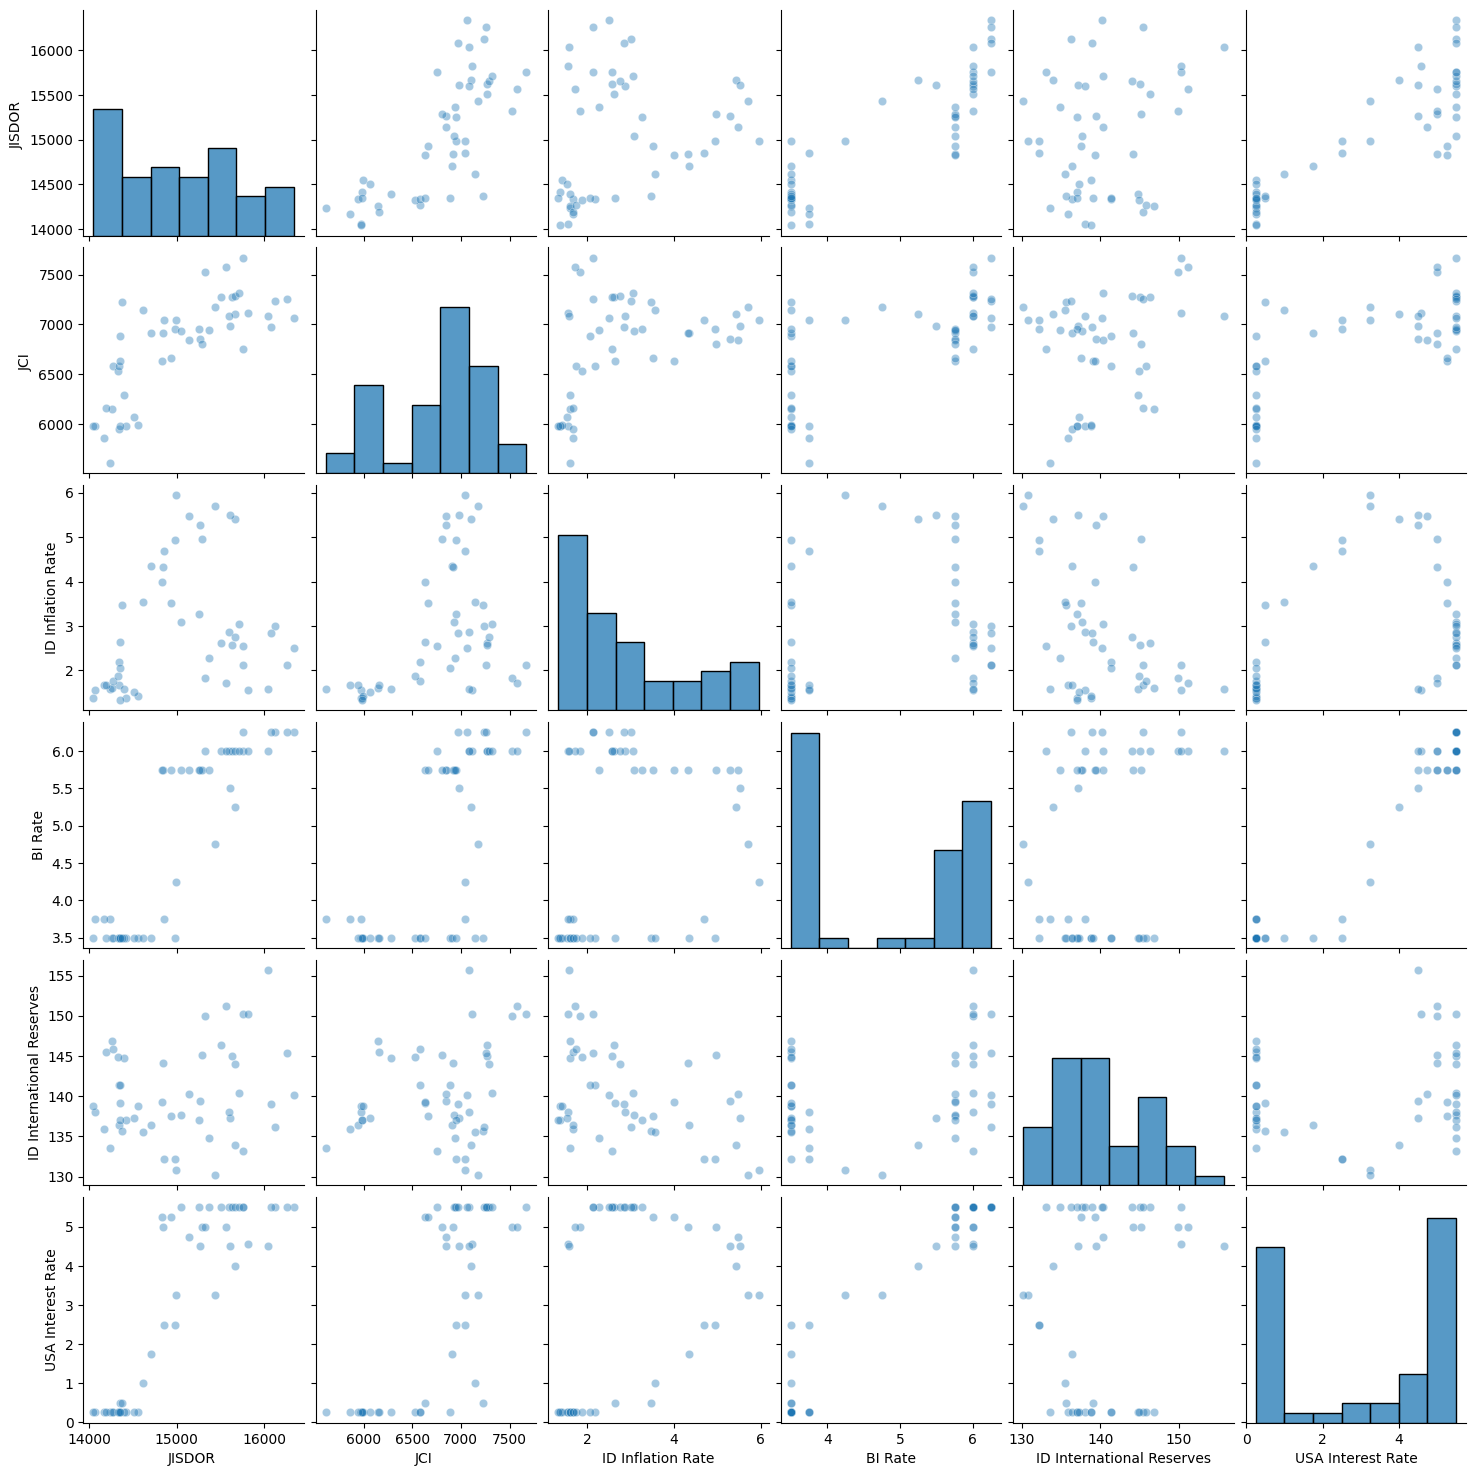

In [12]:
sns.pairplot(df, kind='scatter', plot_kws={'alpha':0.4})

In [15]:
correlation_matrix = df.corr()
correlation_matrix

,JISDOR,JCI,ID Inflation Rate,BI Rate,ID International Reserves,USA Interest Rate
JISDOR,1.000000,0.750410,0.269471,0.886396,0.212228,0.881729
JCI,0.750410,1.000000,0.416715,0.676246,0.258567,0.739596
ID Inflation Rate,0.269471,0.416715,1.000000,0.227681,-0.444938,0.379391
BI Rate,0.886396,0.676246,0.227681,1.000000,0.316127,0.969091
ID International Reserves,0.212228,0.258567,-0.444938,0.316127,1.000000,0.185165
USA Interest Rate,0.881729,0.739596,0.379391,0.969091,0.185165,1.000000


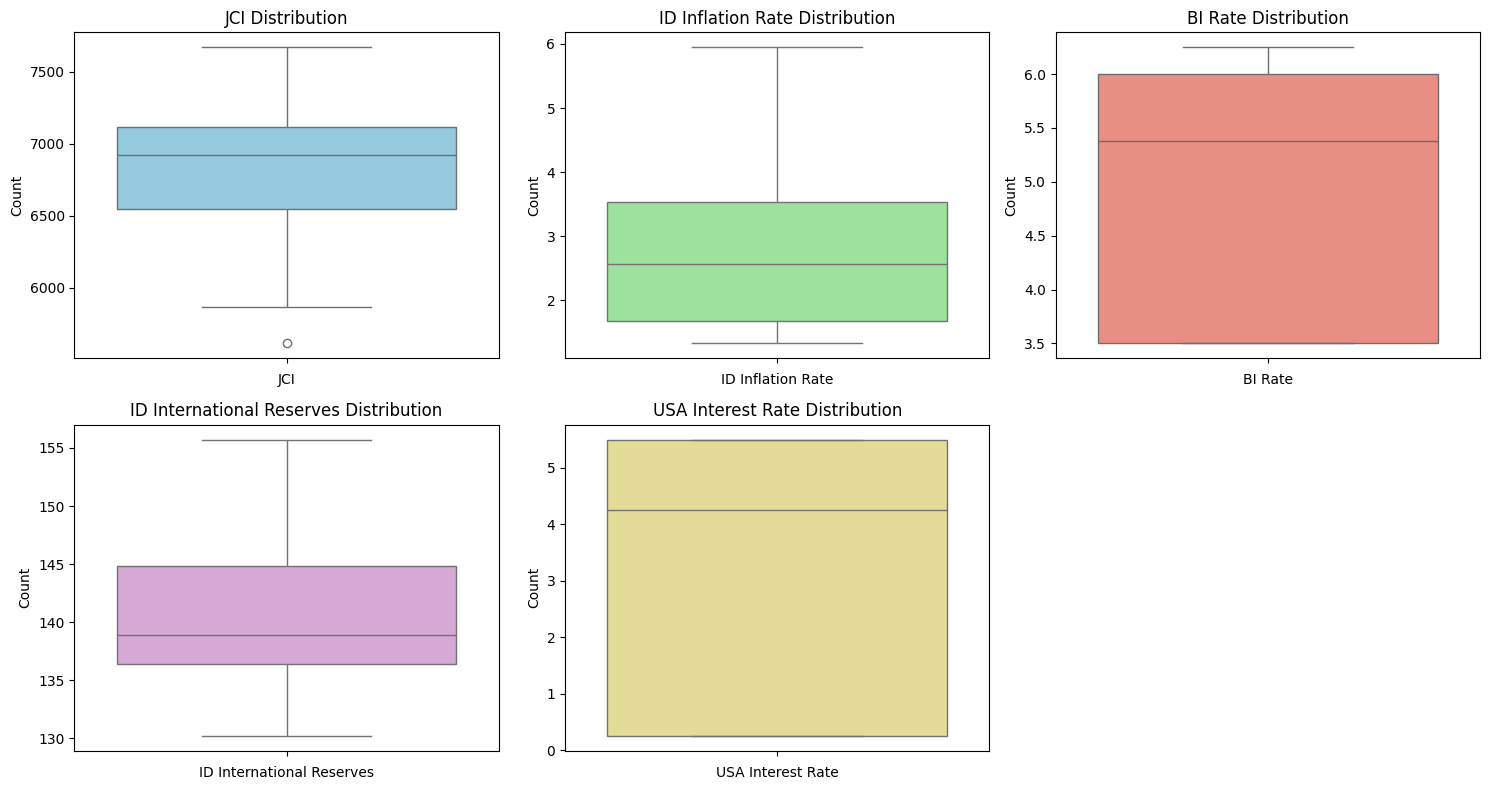

In [31]:
plt.figure(figsize=(15,8))

plt.subplot(2,3,1)
sns.boxplot(df["JCI"], color="skyblue")
plt.title("JCI Distribution")
plt.xlabel("JCI")
plt.ylabel("Count")

plt.subplot(2,3,2)
sns.boxplot(df["ID Inflation Rate"], color="lightgreen")
plt.title("ID Inflation Rate Distribution")
plt.xlabel("ID Inflation Rate")
plt.ylabel("Count")

plt.subplot(2,3,3)
sns.boxplot(df["BI Rate"], color="salmon")
plt.title("BI Rate Distribution")
plt.xlabel("BI Rate")
plt.ylabel("Count")

plt.subplot(2,3,4)
sns.boxplot(df["ID International Reserves"], color="plum")
plt.title("ID International Reserves Distribution")
plt.xlabel("ID International Reserves")
plt.ylabel("Count")

plt.subplot(2,3,5)
sns.boxplot(df["USA Interest Rate"], color="khaki")
plt.title("USA Interest Rate Distribution")
plt.xlabel("USA Interest Rate")
plt.ylabel("Count")


plt.subplot(2,3,6)
plt.axis("off")

plt.tight_layout()
plt.show()

In [37]:
jci_only = df["JCI"]
q1 = jci_only.quantile(0.25)
q3 = jci_only.quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

print(lower, upper)



5695.112500000001 7963.4125


In [38]:
jci_outliers = jci_only[(jci_only < lower) | (jci_only > upper)]
print(jci_outliers)

0    5612.4
Name: JCI, dtype: float64


In [43]:
X1 = df[["JCI", "ID Inflation Rate", "BI Rate", "ID International Reserves", "USA Interest Rate"]]
y = df["JISDOR"]

In [44]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size = 0.3, random_state = 42)

In [45]:
model1 = LinearRegression()

In [46]:
model1.fit(X1_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [47]:
model1.coef_

array([ 5.28140849e-01, -4.57974337e+01,  5.31769417e+02, -2.21453913e+01,
       -6.82945357e+01])

In [48]:
model1.score(X1, y)

0.8407236500566363

In [49]:
pred1 = model1.predict(X1_test)

Text(0.5, 1.0, 'JISDOR vs. Model Predictions')

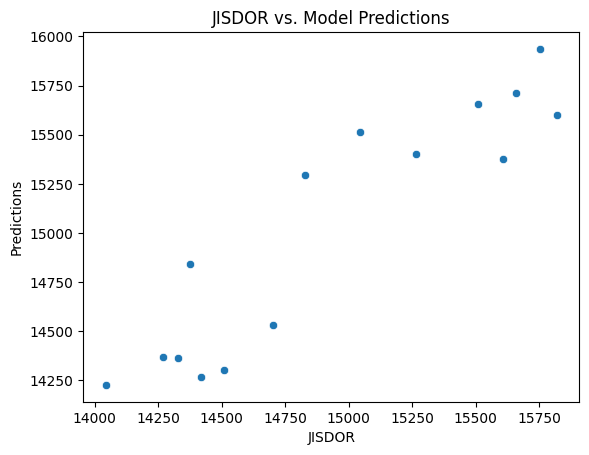

In [50]:
sns.scatterplot(x=y_test, y=pred1)
plt.ylabel('Predictions')
plt.title('JISDOR vs. Model Predictions')

In [51]:
print('Mean Absolute Error:',mean_absolute_error(y_test, pred1))
print('Mean Squared Error:',mean_squared_error(y_test, pred1))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, pred1)))

Mean Absolute Error: 214.23641084353767
Mean Squared Error: 65025.455750354464
Root Mean Squared Error: 255.0008936265802


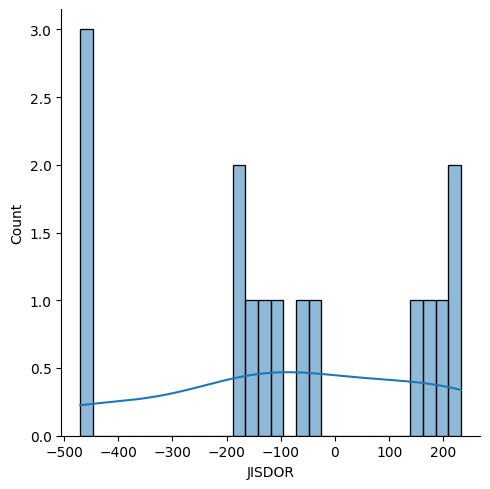

In [52]:
res1 = y_test - pred1
sns.displot(res1, bins=30, kde=True)

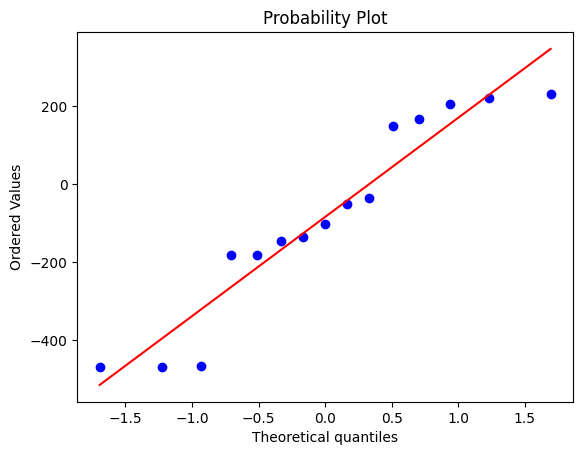

In [53]:
stats.probplot(res1, dist="norm", plot=pylab)
pylab.show()